In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import os

# Loading dataset

In [10]:
data_delay_4_6 = pd.read_csv(r'C:\Users\ply58\OneDrive\Tài liệu\PythonML\ML_git\Python_ML\BaitapDS108\Lab 4\Data\delay_4_6_CONDITION_PRODUCT_SUPPLIER.csv')
data_delay_7_9 = pd.read_csv(r'C:\Users\ply58\OneDrive\Tài liệu\PythonML\ML_git\Python_ML\BaitapDS108\Lab 4\Data\delay_7_9_CONDITION_PRODUCT_SUPPLIER.csv')

data_not_delay_4_6 = pd.read_csv(r'C:\Users\ply58\OneDrive\Tài liệu\PythonML\ML_git\Python_ML\BaitapDS108\Lab 4\Data\not_delay_4_6_CONDITION_PRODUCT_SUPPLIER.csv')
data_not_delay_7_9 = pd.read_csv(r'C:\Users\ply58\OneDrive\Tài liệu\PythonML\ML_git\Python_ML\BaitapDS108\Lab 4\Data\not_delay_7_9_CONDITION_PRODUCT_SUPPLIER.csv')

C:\Users\ply58\AppData\Local\Temp\ipykernel_90152\3198725817.py:4: DtypeWarning: Columns (10,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data_not_delay_4_6 = pd.read_csv(r'C:\Users\ply58\OneDrive\Tài liệu\PythonML\ML_git\Python_ML\BaitapDS108\Lab 4\Data\not_delay_4_6_CONDITION_PRODUCT_SUPPLIER.csv')
C:\Users\ply58\AppData\Local\Temp\ipykernel_90152\3198725817.py:5: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  data_not_delay_7_9 = pd.read_csv(r'C:\Users\ply58\OneDrive\Tài liệu\PythonML\ML_git\Python_ML\BaitapDS108\Lab 4\Data\not_delay_7_9_CONDITION_PRODUCT_SUPPLIER.csv')


# EDA

### Check if there are different columns before concatenation

In [27]:
data_delay_4_6.columns.difference(data_not_delay_4_6.columns)

Index([], dtype='object')

In [28]:
data_delay_7_9.columns.difference(data_not_delay_7_9.columns)

Index([], dtype='object')

### Counting labels

In [ ]:
data_delay_4_6['label'].value_counts()

label
1    9733
Name: count, dtype: int64

In [18]:
data_not_delay_4_6['label'].value_counts()

label
0    389320
Name: count, dtype: int64

In [21]:
data_delay_7_9['label'].value_counts()

label
1    26217
Name: count, dtype: int64

In [22]:
data_not_delay_7_9['label'].value_counts()

label
0    1048680
Name: count, dtype: int64

### Concatenation

In [37]:
data_4_6 = pd.concat([data_delay_4_6, data_not_delay_4_6], axis=0)
data_4_6.head(5)

,Order date,SUBSIDIARY_CD,GLOBAL_NO,CLASSIFY_CD,CUST_CD,BRAND_CD,INNER_CD,SUPPLIER_CD,Sales order line number,Stock class,...,SO_DAY_OF_MONTH,SO_DAY_OF_WEEK,IO_UNFIT_FLG,WEIGHT_UNIT,REASON_CD,SOUF_RCV_NO,QTUF_RCV_NO,SO_TIME,SUPPLIER_CATEGORY_CD,PRODUCT_ASSORT
0,2022-04-04 00:00:00,MJP,1000074430653,21034701,74,HAK1,F7371210001,8107,1,1,...,4,1,0,g,401,805169,NaN,120324,5,
1,2022-04-26 00:00:00,MJP,5004180038393,23028764,4180,S3M1,K9045010089,8484,1,1,...,26,2,0,g,455,NaN,NaN,171618,5,
2,2022-04-19 00:00:00,MJP,1000074434232,21059031,74,THT1,F5109250104,8233,1,1,...,19,2,0,g,451,864727,NaN,184619,5,
3,2022-04-22 00:00:00,MJP,1000074434911,3731227,74,MSM1,79014275005,3013,1,1,...,22,5,0,g,410,NaN,NaN,93246,5,
4,2022-04-22 00:00:00,MJP,1000074435036,3954111,74,MSM1,30357450001,3081,1,1,...,22,5,0,g,410,NaN,NaN,153401,5,


In [38]:
data_7_9 = pd.concat([data_delay_7_9, data_not_delay_7_9], axis=0)
data_7_9.head(5)

,Order date,SUBSIDIARY_CD,GLOBAL_NO,CLASSIFY_CD,CUST_CD,BRAND_CD,INNER_CD,SUPPLIER_CD,Sales order line number,Stock class,...,PACK QTY,WEIGHT PER PIECE,SUPPLIER_DIV,SPECIAL_DIV,SO_DAY_OF_MONTH,SO_DAY_OF_WEEK,REASON_CD,SOUF_RCV_NO,QTUF_RCV_NO,SO_TIME
0,2022-08-25,MJP,08344472000137,21031103,344472,OSA1,F7171260007,8121,8,1,...,0,1020,2.0,0,25,4,453.0,NaN,NaN,135557
1,2022-08-12,MJP,06000641365551,3712333,641,MSM1,30071630003,0263,1,1,...,0,120,1.0,0,12,5,451.0,NaN,NaN,134532
2,2022-07-08,MJP,07032167936864,21045918,32167,SMC1,F7499483132,9102,1,1,...,0,18000,3.0,0,8,5,410.0,NaN,NaN,160936
3,2022-07-08,MJP,01710046000973,21058302,710046,MIB1,F4524160001,9163,1,1,...,0,500,2.0,0,8,5,453.0,NaN,NaN,160702
4,2022-08-25,MJP,07107539916817,21050569,107539,NIQ1,F3017310155,9176,6,1,...,0,36,2.0,0,25,4,455.0,NaN,NaN,160244


In [43]:
data_4_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399053 entries, 0 to 389319
Data columns (total 47 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Order date                       399053 non-null  object 
 1   SUBSIDIARY_CD                    399053 non-null  object 
 2   GLOBAL_NO                        399053 non-null  int64  
 3   CLASSIFY_CD                      399053 non-null  int64  
 4   CUST_CD                          399053 non-null  int64  
 5   BRAND_CD                         399053 non-null  object 
 6   INNER_CD                         399053 non-null  object 
 7   SUPPLIER_CD                      399053 non-null  object 
 8   Sales order line number          399053 non-null  int64  
 9   Stock class                      399053 non-null  int64  
 10  Consider count hodiday Saturday  399053 non-null  object 
 11  SO QTY                           399053 non-null  int64  
 12  OTHER A

In [44]:
data_7_9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1074897 entries, 0 to 1048679
Data columns (total 37 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Order date                       1074897 non-null  object 
 1   SUBSIDIARY_CD                    1074897 non-null  object 
 2   GLOBAL_NO                        1074897 non-null  object 
 3   CLASSIFY_CD                      1074897 non-null  int64  
 4   CUST_CD                          1074897 non-null  int64  
 5   BRAND_CD                         1074897 non-null  object 
 6   INNER_CD                         1074897 non-null  object 
 7   SUPPLIER_CD                      1074897 non-null  object 
 8   Sales order line number          1074897 non-null  int64  
 9   Stock class                      1074897 non-null  int64  
 10  Consider count hodiday Saturday  1074897 non-null  int64  
 11  SO QTY                           1074897 non-null  int6

### Columns

In [41]:
len(data_4_6.columns)

47

In [42]:
len(data_7_9.columns)

37

$\rightarrow$ There are obvious differences in the number of features between the two datasets. The number of features in the data from July to September is less than that in the data from April to June. Here are the columns that appear in the latter dataset but not in the former one:

In [ ]:
data_4_6.columns.difference(data_7_9.columns)

Index(['ACTUAL_SHIP_DAYS', 'EXPENSIVE_FLG', 'HAZARD_FLG', 'HEAVY_FLG',
       'IO_UNFIT_FLG', 'PRODUCT_ASSORT', 'SPECIFY_PRODUCTION_DAYS',
       'SPECIFY_SHIP_DAYS', 'SUPPLIER_CATEGORY_CD', 'WEIGHT_UNIT'],
      dtype='object')

### Imbalanced data

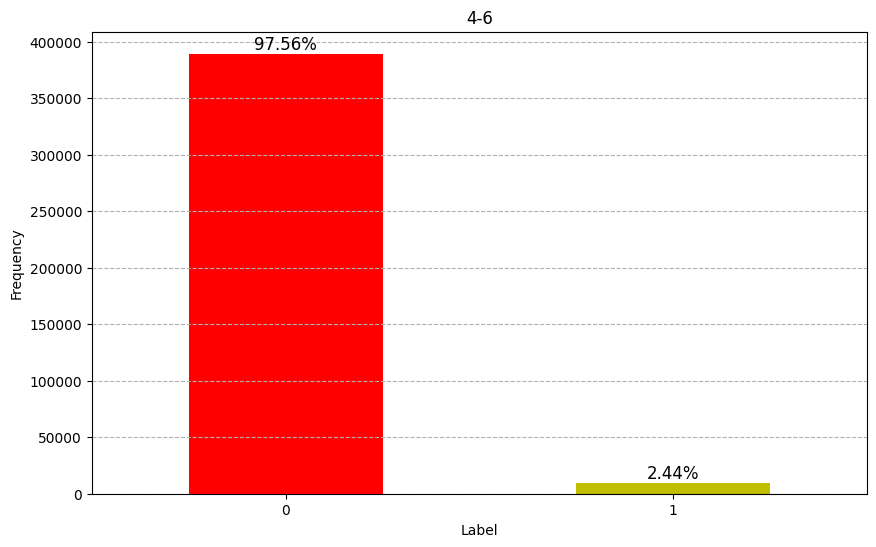

In [82]:
plt.figure(figsize=(10, 6))
counts = data_4_6['label'].value_counts()
percentages = (counts / counts.sum() * 100).round(2)
total = counts.sum()

ax = data_4_6['label'].value_counts().plot( kind='bar', color=['r', 'y'])

for i, (count, pct) in enumerate(zip(counts, percentages)):
    ax.text(i, count + total * 0.01, f'{pct}%', ha='center', fontsize=12)
plt.title('4-6')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

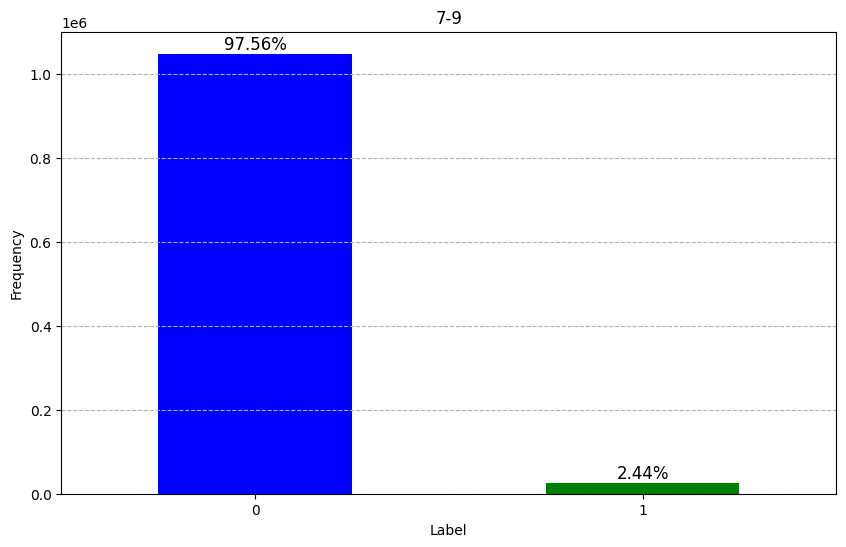

In [83]:
plt.figure(figsize=(10, 6))

counts = data_7_9['label'].value_counts()
percentages = (counts / counts.sum() * 100).round(2)
total = counts.sum()

ax = data_7_9['label'].value_counts().plot( kind='bar', color=['b', 'g'])

for i, (count, pct) in enumerate(zip(counts, percentages)):
    ax.text(i, count + total * 0.01, f'{pct}%', ha='center', fontsize=12)
    
plt.title('7-9')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')